In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [7]:
dataset = pd.read_csv('fraud_detection.csv')
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [9]:
dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
dataset.shape

(6362620, 11)

In [11]:
dataset.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

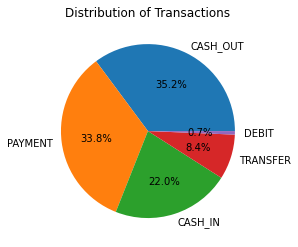

In [29]:
type = dataset['type'].value_counts()
transactions = type.index
quantity = type.values

import matplotlib.pyplot as px
px.pie(quantity,labels= transactions,autopct='%1.1f%%')
px.title('Distribution of Transactions')
 
px.show()

In [32]:
features = ['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']
for feature in features:
    print(f'{feature} and dtype is {dataset[feature].dtype}')

step and dtype is int64
type and dtype is object
amount and dtype is float64
nameOrig and dtype is object
oldbalanceOrg and dtype is float64
newbalanceOrig and dtype is float64
nameDest and dtype is object
oldbalanceDest and dtype is float64
newbalanceDest and dtype is float64
isFraud and dtype is int64
isFlaggedFraud and dtype is int64


In [34]:
# checking Correlation

correlation = dataset.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [37]:
dataset['type']= dataset['type'].map({"CASH_OUT":1, 'PAYMENT':2, 
                                   'CASH_IN':3,'TRANSFER':4, 'DEBIT':5})
dataset['isFraud']= dataset['isFraud'].map({0:'No Fraud', 1:'Fraud'})

In [38]:
print(dataset.head)

<bound method NDFrame.head of          step  type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     2     9839.64  C1231006815      170136.00       160296.36   
1           1     2     1864.28  C1666544295       21249.00        19384.72   
2           1     4      181.00  C1305486145         181.00            0.00   
3           1     1      181.00   C840083671         181.00            0.00   
4           1     2    11668.14  C2048537720       41554.00        29885.86   
...       ...   ...         ...          ...            ...             ...   
6362615   743     1   339682.13   C786484425      339682.13            0.00   
6362616   743     4  6311409.28  C1529008245     6311409.28            0.00   
6362617   743     1  6311409.28  C1162922333     6311409.28            0.00   
6362618   743     4   850002.52  C1685995037      850002.52            0.00   
6362619   743     1   850002.52  C1280323807      850002.52            0.00   

            nameDest 

In [40]:
#splitting the data
from sklearn.model_selection import train_test_split
x=np.array(dataset[["type",'amount','oldbalanceOrg', 'newbalanceOrig']])
y = np.array(dataset[['isFraud']])

In [43]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))

0.9999998035400511


In [44]:
print(model.score(x_test,y_test))

0.9997053100766665
